In [ ]:
# Zadanie 1

"""
Masz następujące dane:
y_true = [10, 20, 30, 40, 50]
y_pred = [12, 18, 33, 37, 52]

Wymagania:
Oblicz MSE ręcznie (bez bibliotek)
Oblicz MAE ręcznie
Zweryfikuj wyniki używając sklearn.metrics

Oczekiwany rezultat:
Wartości MSE i MAE
Porównanie z sklearn
"""

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = np.array([10, 20, 30, 40, 50])
y_pred = np.array([12, 18, 33, 37, 52])

errors = y_true - y_pred
squared_errors = errors ** 2
mse = np.mean(squared_errors)
mae = np.mean(np.abs(errors))

mse_sk = mean_squared_error(y_true, y_pred)
mae_sk = mean_absolute_error(y_true, y_pred)

print(f"""
MSE ręcznie: {mse:.2f}, MSE ze Scikit-Learn: {mse_sk:.2f}
MAE ręcznie: {mae:.2f}, MAE ze Scikit-Learn: {mae_sk:.2f}
""")



In [ ]:
# Zadanie 2 - Wpływ outliera na MSE i MAE

"""
Dataset: Stwórz wektor 20 losowych wartości z rozkładu normalnego (mean=50, std=10).

Wymagania:
Oblicz MSE i MAE dla tych danych (predykcja = średnia)
Dodaj jeden outlier (wartość 200)
Oblicz ponownie MSE i MAE
Porównaj wzrost obu metryk

Oczekiwany rezultat:
Tabela z metrykami przed i po dodaniu outliera
Wykres pokazujący dane z outlierem
"""

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=20)
y_pred = np.mean(data)

In [ ]:
# Zadanie 3 - Log Loss dla klasyfikacji

"""
Masz następujące predykcje prawdopodobieństwa:
y_true = [1, 0, 1, 1, 0]
Model A: [0.9, 0.2, 0.8, 0.7, 0.3]
Model B: [0.6, 0.4, 0.55, 0.65, 0.45]

Wymagania:
Oblicz Log Loss dla obu modeli
Określ, który model jest lepszy
Uzasadnij wynik

Oczekiwany rezultat:
Wartości Log Loss
Interpretacja wyników
"""

In [ ]:
# Zadanie 4 - Gradient Descent dla f(x) = (x-3)²

"""
Zaimplementuj Gradient Descent dla funkcji f(x) = (x-3)².

Wymagania:
Napisz funkcję f(x) i jej gradient
Uruchom GD z punktu startowego x=10
Learning rate = 0.1, 50 iteracji
Wyświetl trajektorię na wykresie

Oczekiwany rezultat:
Wykres funkcji z zaznaczoną trajektorią GD
"""

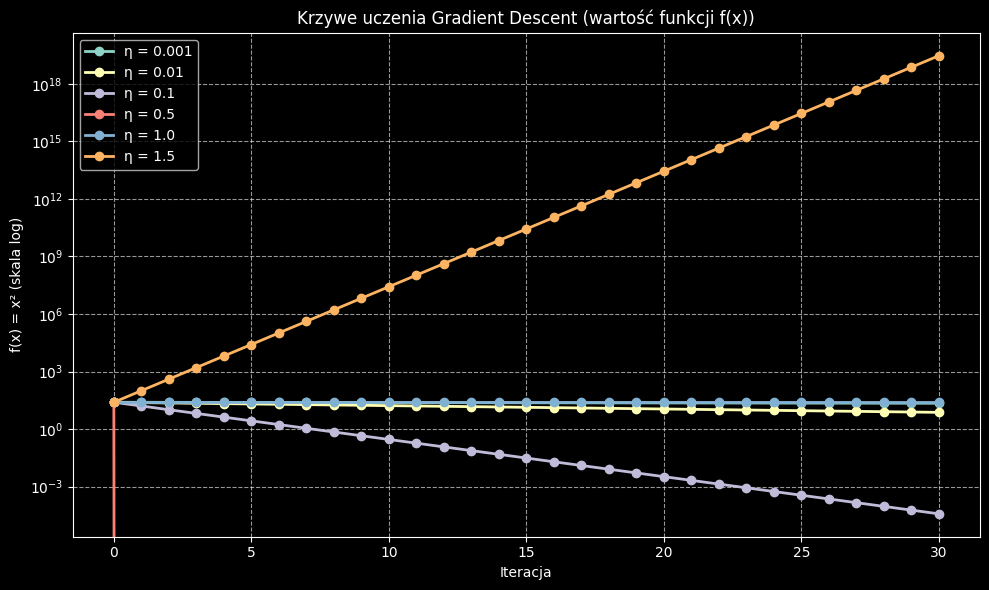

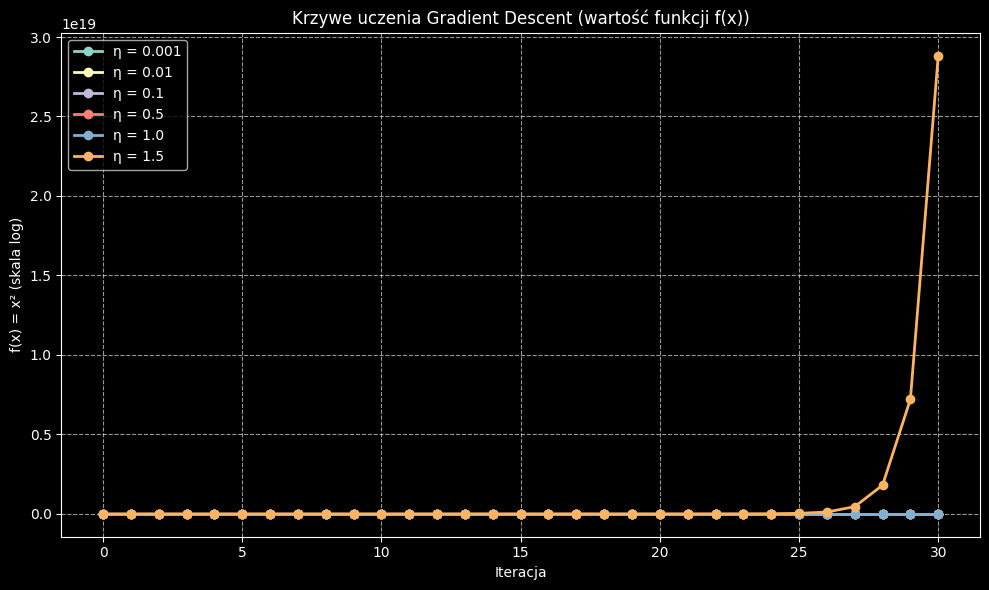

=== PODSUMOWANIE ===
η = 0.001 -> końcowe |x| = 4.708540
η = 0.01 -> końcowe |x| = 2.727422
η = 0.1  -> końcowe |x| = 0.006190
η = 0.5  -> końcowe |x| = 0.000000
η = 1.0  -> końcowe |x| = 5.000000
η = 1.5  -> końcowe |x| = 5368709120.000000

Optymalny learning rate: η = 0.5

=== WNIOSKI ===
Średni learning rate – szybka i stabilna zbieżność do minimum (najlepszy wybór).


In [24]:
# Zadanie 5 - Porównanie Learning Rates

"""
Dla funkcji f(x) = x² uruchom Gradient Descent z różnymi learning rates.

Wymagania:
Przetestuj: η = 0.001, 0.01, 0.1, 0.5, 1.0, 1.5
Punkt startowy: x = 5
30 iteracji
Określ, które η działa najlepiej

Oczekiwany rezultat:
Wykres krzywych uczenia dla każdego η
Wnioski o optymalnym learning rate
"""

import matplotlib.pyplot as plt

def function(x):
    return x**2
def gradient(x):
    return 2*x
def run_gd(start_x, learning_rate, num_iterations):
    x = start_x
    history = [x]

    for _ in range(num_iterations):
        x = x - learning_rate * gradient(x)
        history.append(x)

    return history

learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 1.5]
start_x = 5.0
num_iterations = 30

histories = {}
final_values = {}

# uruchomienie Gradient Descent dla każdego learning rate
for lr in learning_rates:
    history = run_gd(start_x, lr, num_iterations)
    histories[lr] = history
    final_values[lr] = abs(history[-1])  # odległość od minimum (0)

# rysowanie wykresu krzywych uczenia
plt.figure(figsize=(10, 6))

for lr, history in histories.items():
    values = [function(x) for x in history]
    plt.plot(values, marker='o', linewidth=2, label=f"η = {lr}")

plt.yscale("log")  # skala logarytmiczna żeby wszystkie krzywe były widoczne
plt.title("Krzywe uczenia Gradient Descent (wartość funkcji f(x))")
plt.xlabel("Iteracja")
plt.ylabel("f(x) = x² (skala log)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# dla porównania wykres bez skali logarytmicznej na osi y
plt.figure(figsize=(10, 6))

for lr, history in histories.items():
    values = [function(x) for x in history]
    plt.plot(values, marker='o', linewidth=2, label=f"η = {lr}")

plt.title("Krzywe uczenia Gradient Descent (wartość funkcji f(x))")
plt.xlabel("Iteracja")
plt.ylabel("f(x) = x² (skala log)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# wybór learning rate
best_lr = min(final_values, key=final_values.get)

print("=== PODSUMOWANIE ===")
for lr in learning_rates:
    print(f"η = {lr:<4} -> końcowe |x| = {final_values[lr]:.6f}")

print(f"\nOptymalny learning rate: η = {best_lr}")

# printowanie wniosków
print("\n=== WNIOSKI ===")

if best_lr < 0.01:
    print("Bardzo mały learning rate – zbieżność jest stabilna, ale bardzo wolna.")
elif best_lr <= 0.5:
    print("Średni learning rate – szybka i stabilna zbieżność do minimum (najlepszy wybór).")
elif best_lr <= 1.0:
    print("Duży learning rate – może powodować oscylacje wokół minimum.")
else:
    print("Zbyt duży learning rate – algorytm rozbiega się i nie znajduje minimum.")


Dane: 200 obserwacji
X: zakres [-2.62, 2.72]
y: zakres [-216.91, 233.02]

=== Trening Gradient Descent ===

Iteracja 200: w = 84.3078, b = 2.4526, MSE = 412.8419
Iteracja 400: w = 86.9107, b = 2.8393, MSE = 406.5311
Iteracja 600: w = 86.9928, b = 2.8564, MSE = 406.5247
Iteracja 800: w = 86.9954, b = 2.8570, MSE = 406.5247
Iteracja 1000: w = 86.9955, b = 2.8570, MSE = 406.5247

Wyuczone parametry: w = 86.9955, b = 2.8570
Końcowy MSE: 406.5247


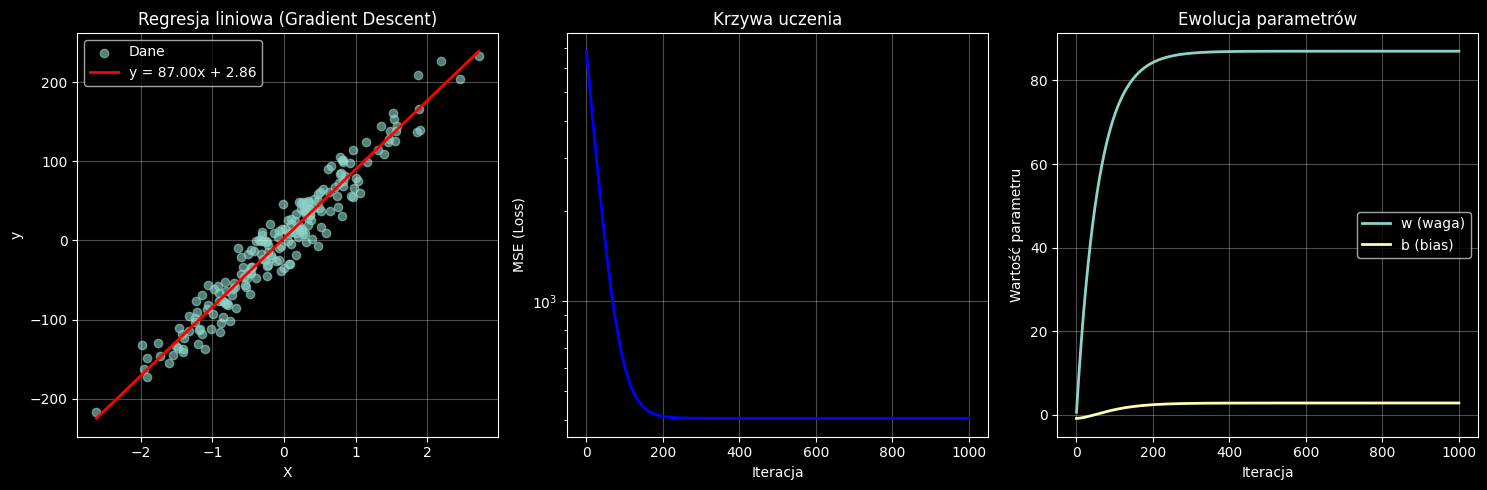


Sklearn LinearRegression: w = 86.9955, b =2.8570


In [23]:
# Zadanie 9 - Implementacja Gradient Descent dla regresji liniowej

"""
Zaimplementuj od zera Gradient Descent dla regresji liniowej y = wx + b.
Dataset: Wygeneruj dane make_regression(n_samples=200, n_features=1, noise=20)

Wymagania:
Napisz funkcje: predict, compute_mse, compute_gradients
Zaimplementuj pętlę treningu
Porównaj z sklearn LinearRegression

Oczekiwany rezultat:
Wykres danych z linią regresji
Krzywa uczenia (loss vs iteracje)
Porównanie parametrów z sklearn
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

np.random.seed(42)
X, y = make_regression(n_samples=200, n_features=1, noise=20)
X = X.flatten()

print(f"Dane: {len(X)} obserwacji")
print(f"X: zakres [{X.min():.2f}, {X.max():.2f}]")
print(f"y: zakres [{y.min():.2f}, {y.max():.2f}]")

def predict(X, w ,b):
    return w * X + b

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y, w, b):
    n = len(y)
    y_pred = predict(X, w, b)
    error = y - y_pred

    dw = (-2/n) * np.sum(error * X)
    db = (-2/n) * np.sum(error)

    return dw, db

def gradient_descent_linear(X, y, learning_rate=0.01, num_iterations=1000):
    w = np.random.randn()
    b = np.random.randn()

    history = {
        "w": [w], "b": [b],
        "loss": [compute_mse(y, predict(X, w, b))]
    }

    for i in range(num_iterations):
        dw, db = compute_gradients(X, y, w, b)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        loss = compute_mse(y, predict(X, w, b))
        history['w'].append(w)
        history['b'].append(b)
        history['loss'].append(loss)

        if (i + 1) % 200 == 0:
            print(f"Iteracja {i+1}: w = {w:.4f}, b = {b:.4f}, MSE = {loss:.4f}")

    return w, b, history

print("\n=== Trening Gradient Descent ===\n")
w_final, b_final, history = gradient_descent_linear(X, y, learning_rate=0.01, num_iterations=1000)
print(f"\nWyuczone parametry: w = {w_final:.4f}, b = {b_final:.4f}")
print(f"Końcowy MSE: {history['loss'][-1]:.4f}")
# Wizualizacja
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# 1. Dane i linia regresji
axes[0].scatter(X, y, alpha=0.6, label='Dane')
x_line = np.linspace(X.min(), X.max(), 100)
axes[0].plot(x_line, predict(x_line, w_final, b_final), 'r-',
    linewidth=2, label=f'y = {w_final:.2f}x + {b_final:.2f}')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_title('Regresja liniowa (Gradient Descent)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Krzywa uczenia (Loss)
axes[1].plot(history['loss'], 'b-', linewidth=2)
axes[1].set_xlabel('Iteracja')
axes[1].set_ylabel('MSE (Loss)')
axes[1].set_title('Krzywa uczenia')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

# 3. Ewolucja parametrów
axes[2].plot(history['w'], label='w (waga)', linewidth=2)
axes[2].plot(history['b'], label='b (bias)', linewidth=2)
axes[2].set_xlabel('Iteracja')
axes[2].set_ylabel('Wartość parametru')
axes[2].set_title('Ewolucja parametrów')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Porównanie ze sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
print(f"\nSklearn LinearRegression: w = {lr.coef_[0]:.4f}, b ={lr.intercept_:.4f}")